# Air Quality Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Reading and Exploring the Air Quality Dataset

In [4]:
df = pd.read_csv('air quality data.csv')

#### Analyzing the Dataset 
 - Size, data types, null value rate, statistical information for each column

In [5]:
df.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
5,Ahmedabad,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN
6,Ahmedabad,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN
7,Ahmedabad,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN
8,Ahmedabad,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN
9,Ahmedabad,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN


In [6]:
df.tail(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29521,Visakhapatnam,33.17,108.22,5.58,42.45,27.06,13.70,0.73,13.65,34.85,3.99,10.24,2.32,95.0
29522,Visakhapatnam,25.40,83.38,2.76,34.09,19.92,13.13,0.54,10.40,43.27,2.88,12.03,1.33,100.0
29523,Visakhapatnam,34.36,90.90,1.22,23.38,13.12,14.45,0.56,10.92,35.12,2.99,3.15,1.60,86.0
29524,Visakhapatnam,13.45,58.54,2.30,21.60,13.09,12.27,0.41,8.19,29.38,1.28,5.64,0.92,77.0
29525,Visakhapatnam,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [7]:
df.shape

(29531, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [9]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [11]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [12]:
df.isnull().sum().sum()

83807

In [13]:
df.duplicated().sum()

2297

In [14]:
#Drop rows where the 'AQI' column has missing values
df1 = df.dropna(subset=['AQI'],inplace=True)

In [15]:
df.isnull().sum()

City           0
PM2.5        678
PM10        7086
NO           387
NO2          391
NOx         1857
NH3         6536
CO           445
SO2          605
O3           807
Benzene     3535
Toluene     5826
Xylene     15372
AQI            0
dtype: int64

In [16]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [17]:
df.shape

(24850, 14)

In [18]:
null_value_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [19]:
null_value_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

### Key Considerations:

Xylene has the highest percentage of missing values(61.86%), so you'll need to decide whether to impute these values or drop the feature

PM10 and NH3 also have significant missing values (around 28-26%)

No missing Values: City and AQI have 0% null values.

## Now we will start our Data Exploration using Visulization EDA - Univariate analysis for each feature

## Exploratory Data Analysis

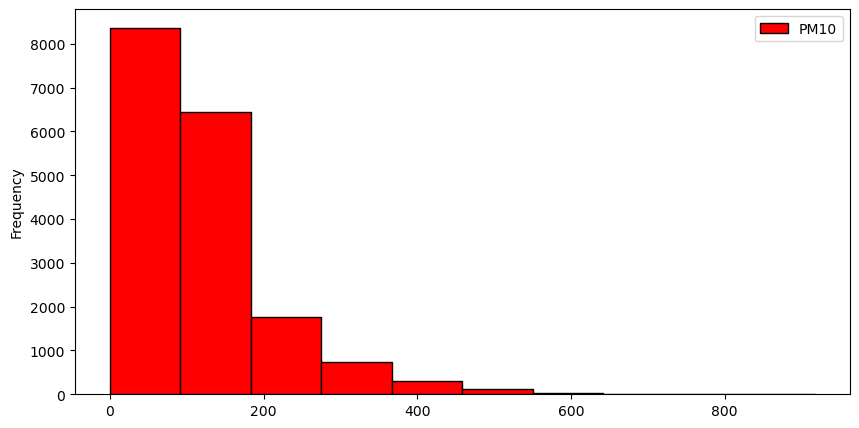

In [20]:
df['PM10'].plot(kind='hist',figsize=(10,5),color='red',edgecolor='black')
plt.legend()
plt.show()

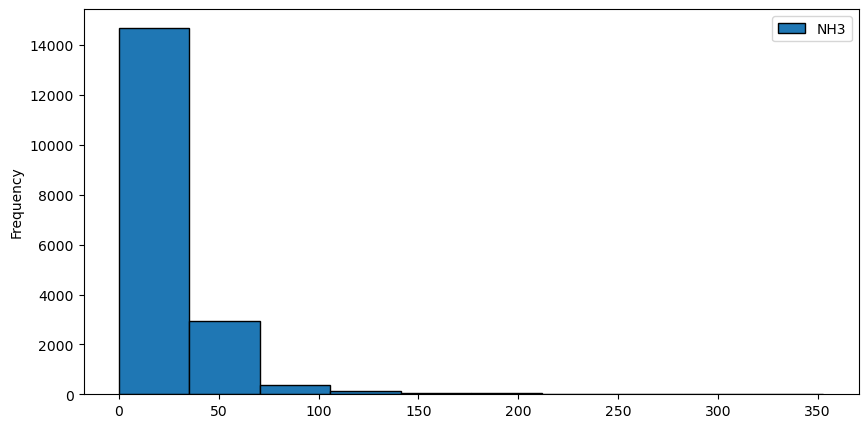

In [21]:
df['NH3'].plot(kind='hist',figsize=(10,5),edgecolor='black')
plt.legend()
plt.show()

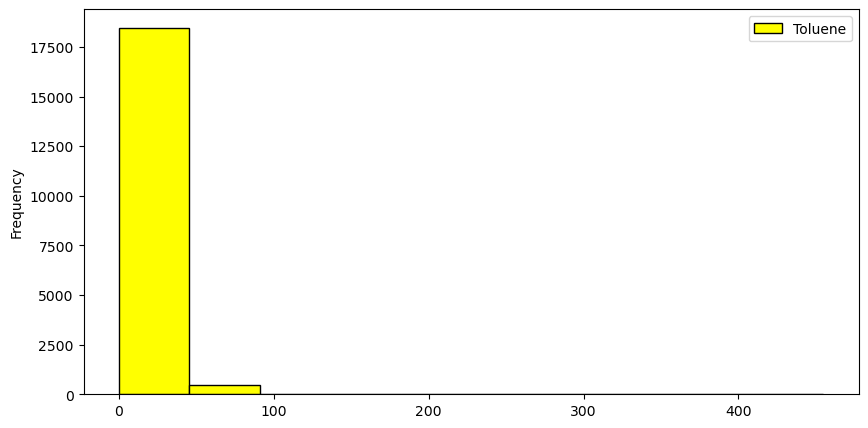

In [22]:
df['Toluene'].plot(kind='hist',figsize=(10,5),color='yellow',edgecolor='black')
plt.legend()
plt.show()

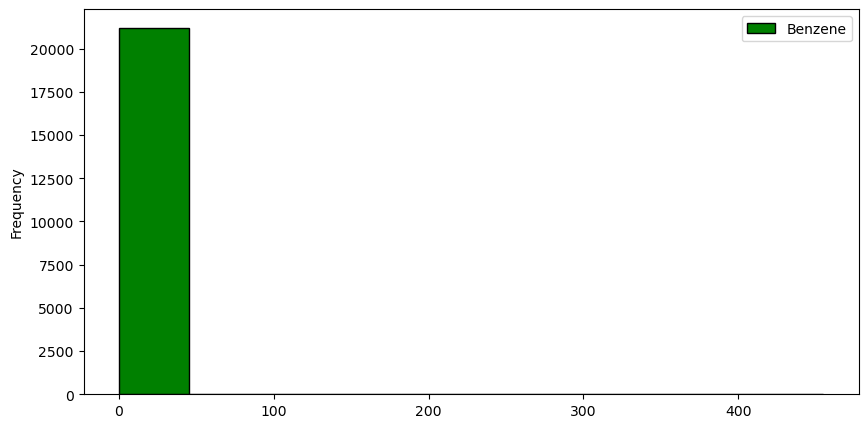

In [23]:
df['Benzene'].plot(kind='hist',figsize=(10,5),color='green',edgecolor='black')
plt.legend()
plt.show()

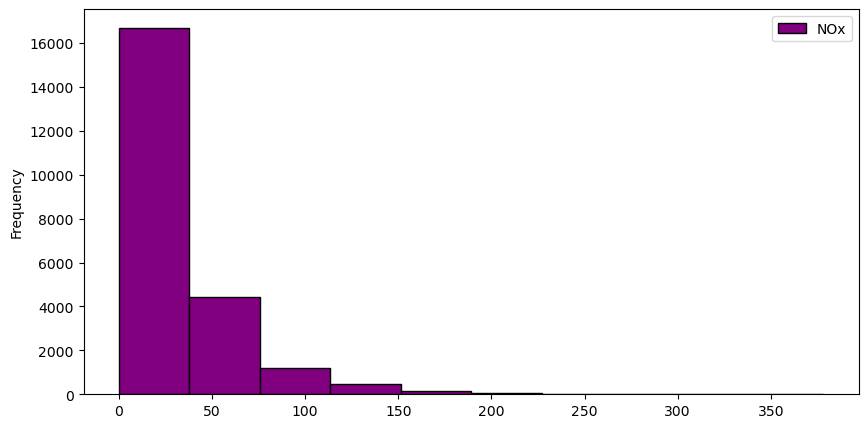

In [24]:
df['NOx'].plot(kind='hist',figsize=(10,5),color='purple',edgecolor='black')
plt.legend()
plt.show()

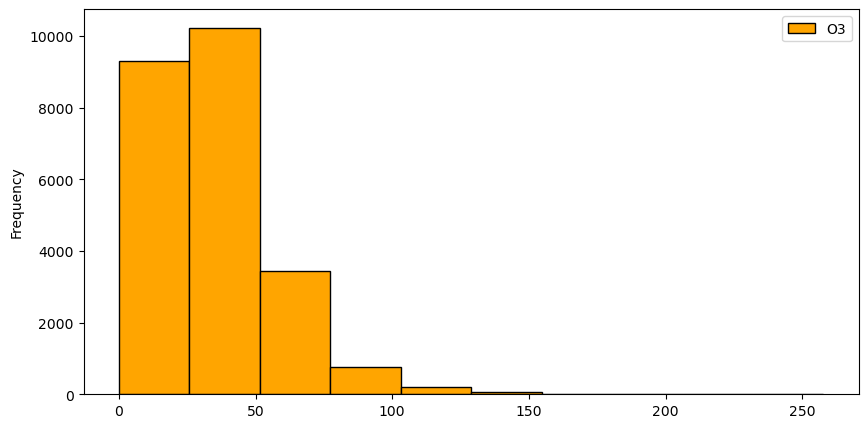

In [25]:
df['O3'].plot(kind='hist',figsize=(10,5),color='orange',edgecolor='black')
plt.legend()
plt.show()

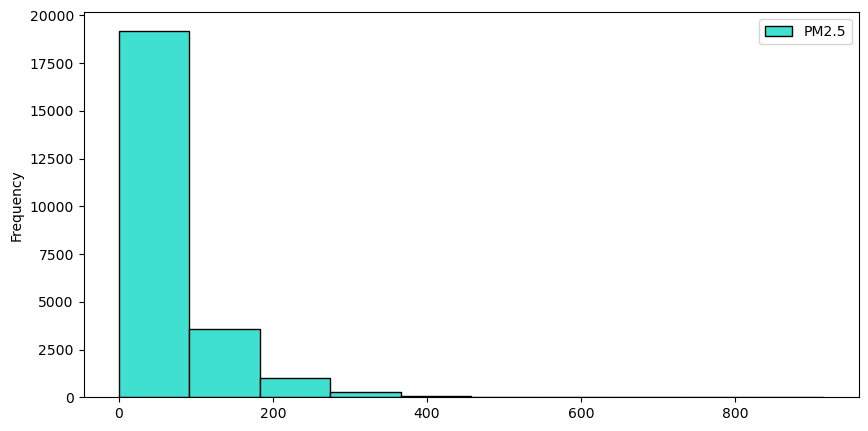

In [26]:
df['PM2.5'].plot(kind='hist',figsize=(10,5),color='turquoise',edgecolor='black')
plt.legend()
plt.show()

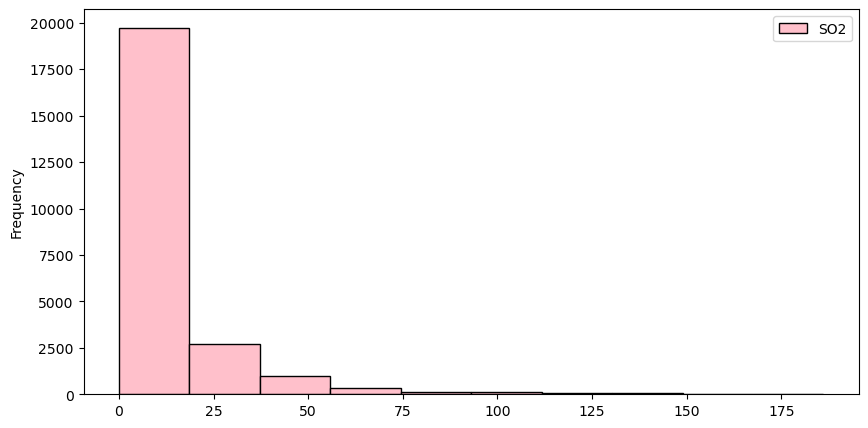

In [27]:
df['SO2'].plot(kind='hist',figsize=(10,5),color='pink',edgecolor='black')
plt.legend()
plt.show()

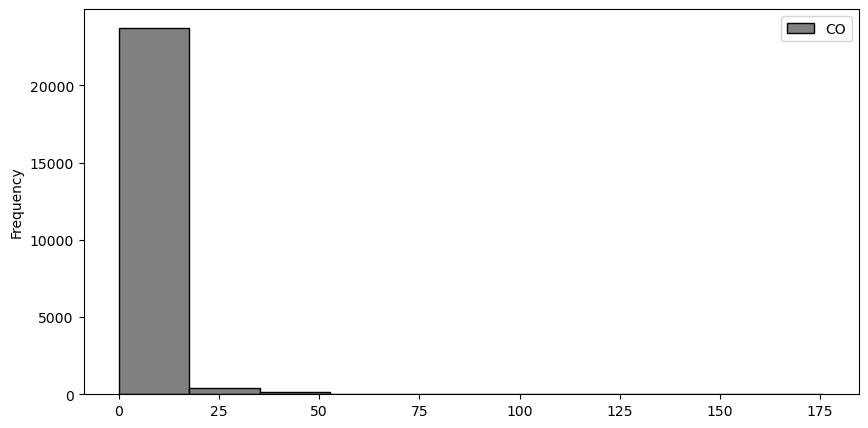

In [28]:
df['CO'].plot(kind='hist',figsize=(10,5),color='grey',edgecolor='black')
plt.legend()
plt.show()

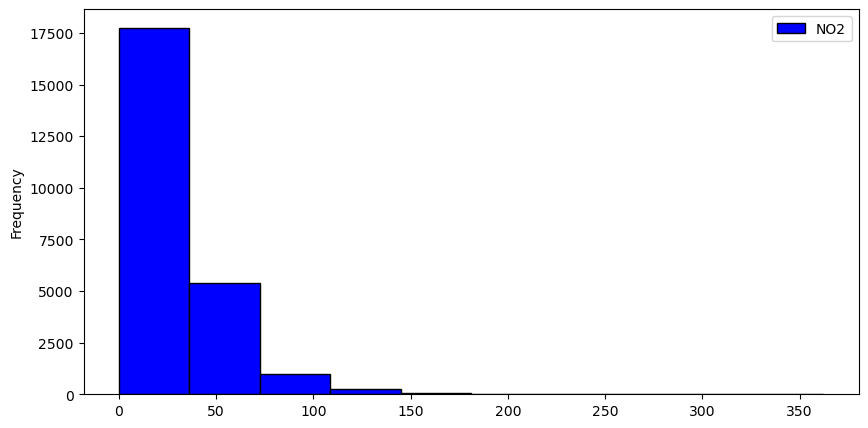

In [29]:
df['NO2'].plot(kind='hist',figsize=(10,5),color='blue',edgecolor='black')
plt.legend()
plt.show()

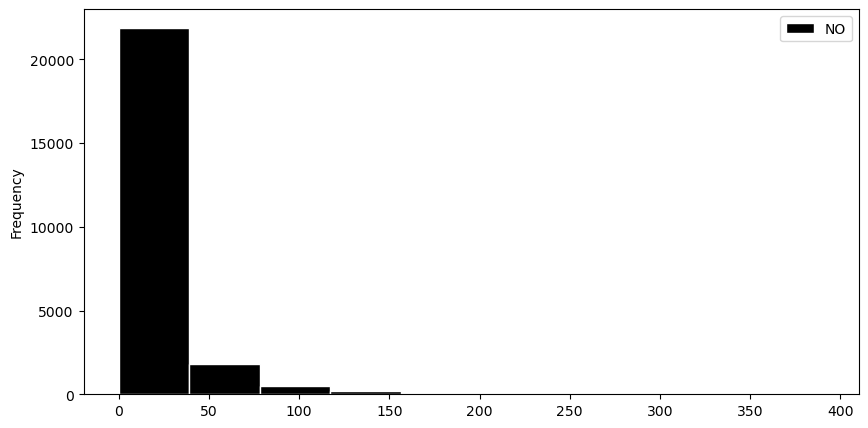

In [30]:
df['NO'].plot(kind='hist',figsize=(10,5),color='black',edgecolor='white')
plt.legend()
plt.show()

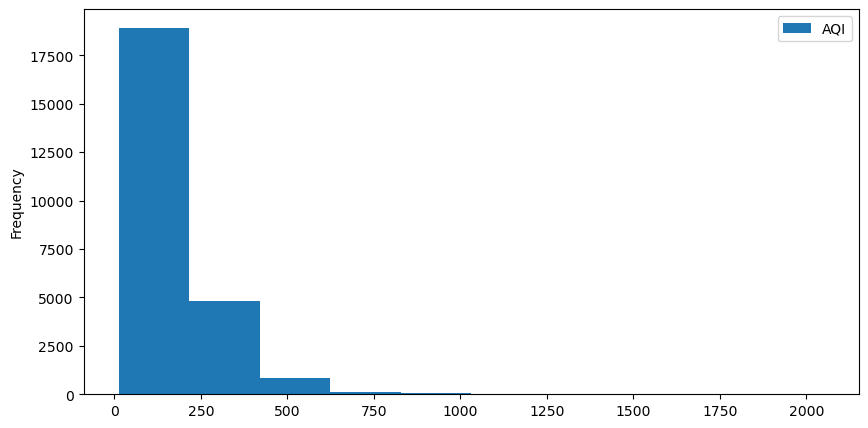

In [31]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

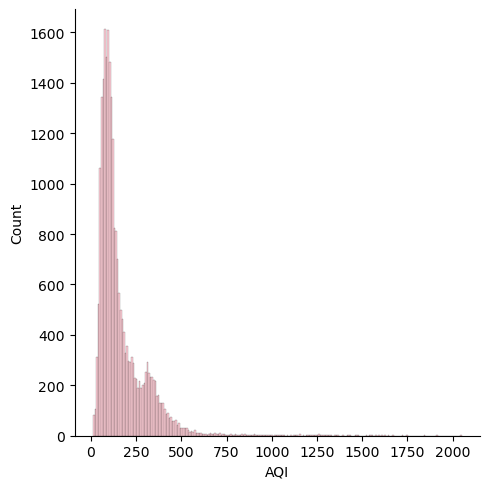

In [32]:
sns.displot(df, x='AQI', color='pink')
plt.show()

## Bivariate Analysis

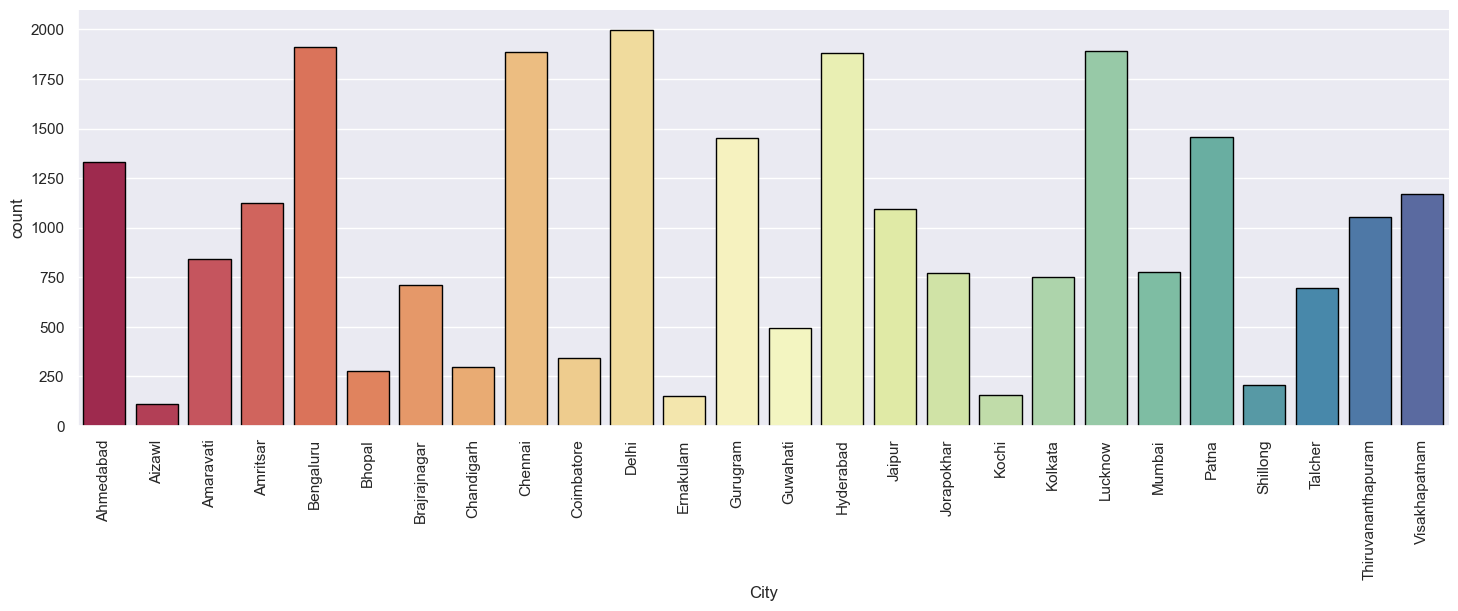

In [33]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3,palette='Spectral',edgecolor='black')
graph.set_xticklabels(rotation=90)

In [34]:
df.describe().loc['std']

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [35]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [36]:
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NO2" : {np.nan:28.978391},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.345267},
    "SO2" : {np.nan:14.362933},
    "O3" : {np.nan:34.912885},
    "Benzene" : {np.nan:3.458668},
    "Toluene" : {np.nan:9.525714},
    "Xylene" : {np.nan:3.588683},
    "AQI" : {np.nan:166.463581}})

In [37]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

### Detecting outliers and treatment
We drew boxplots to observe outlier data.

<Axes: >

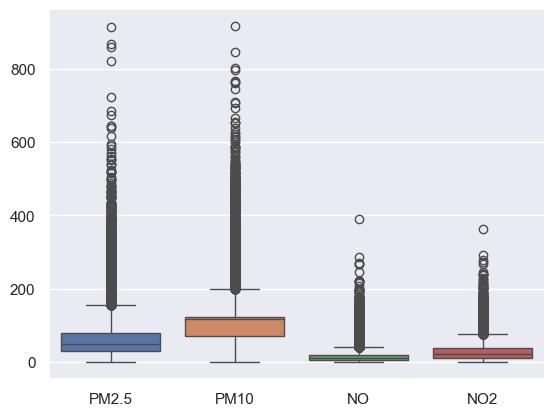

In [38]:
sns.boxplot(data=df[['PM2.5','PM10','NO','NO2']])

<Axes: >

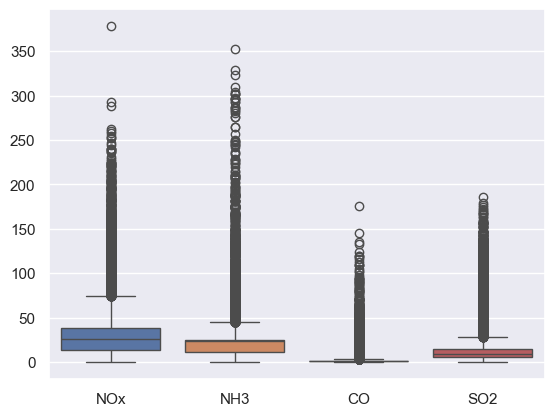

In [39]:
sns.boxplot(data=df[['NOx','NH3','CO','SO2']])

<Axes: >

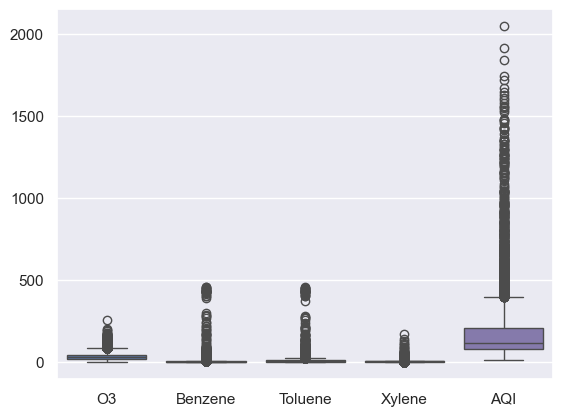

In [40]:
sns.boxplot(data=df[['O3','Benzene','Toluene','Xylene','AQI']])

### Data Editing Procedures

In [41]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df
df = replace_outliers_with_quartiles(df) 


<Axes: >

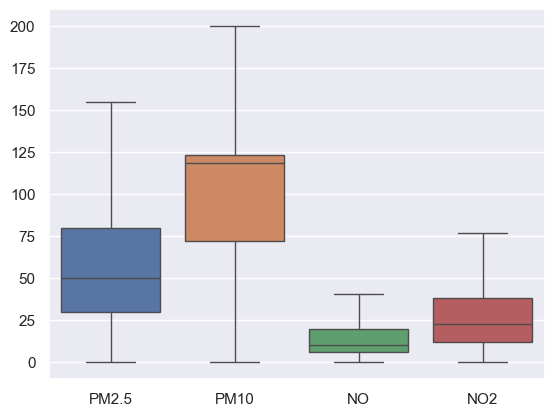

In [42]:
sns.boxplot(data=df[['PM2.5','PM10','NO','NO2']])

<Axes: >

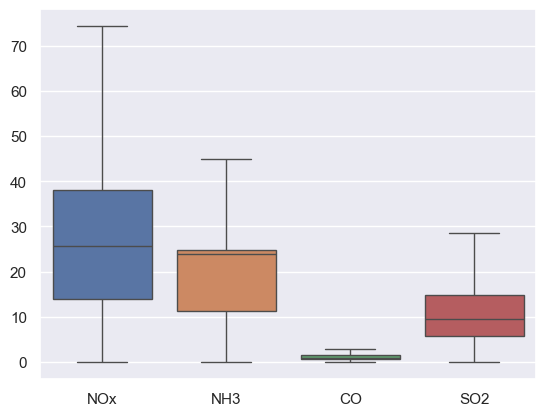

In [43]:
sns.boxplot(data=df[['NOx','NH3','CO','SO2']])

<Axes: >

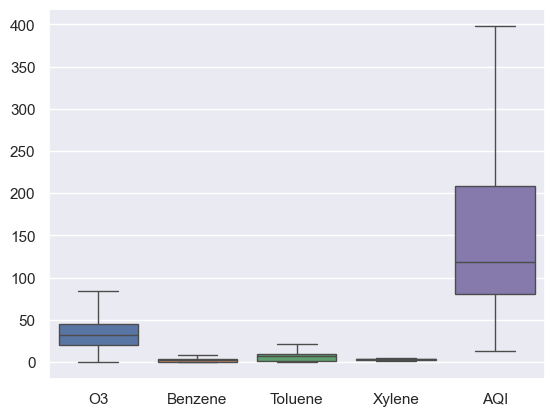

In [44]:
sns.boxplot(data=df[['O3','Benzene','Toluene','Xylene','AQI']])

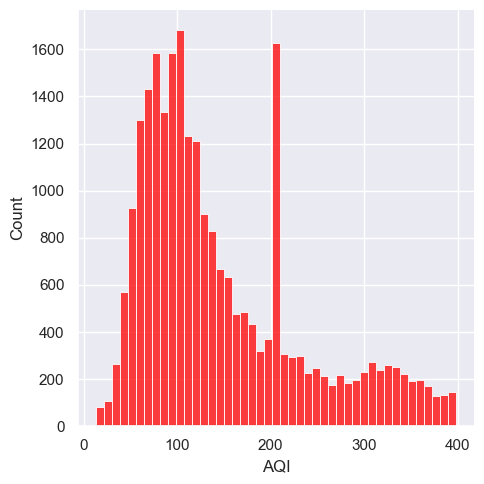

In [45]:
# Distribution of AQI from 2015-2020
sns.displot(df, x="AQI", color="red")
plt.show()

In [46]:
df1 = df.drop(columns=['City'])

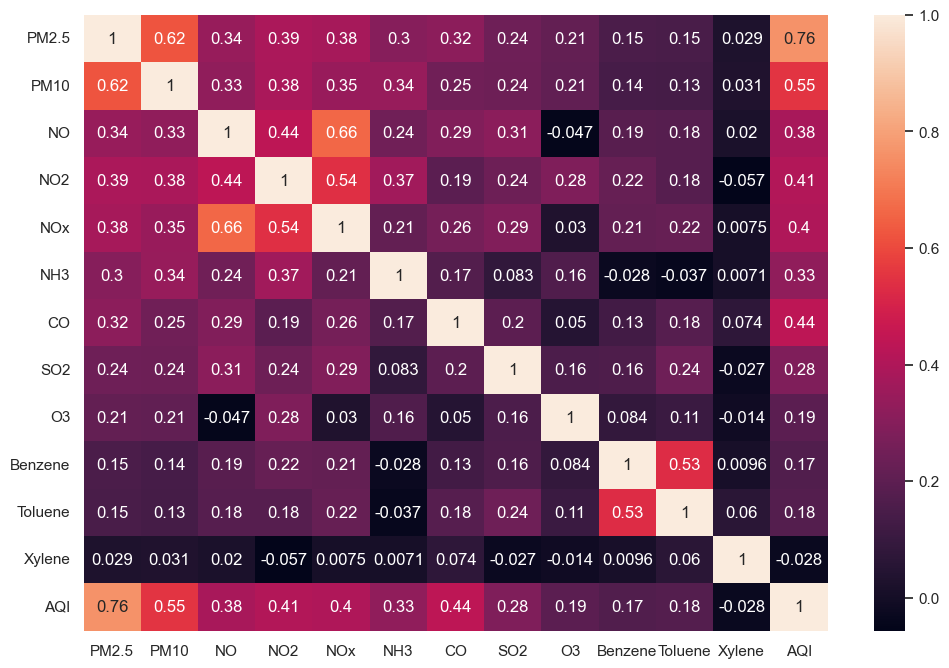

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [48]:
#Dropping unnecessary columns
df.drop(['City'],axis=1,inplace=True)

In [49]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


## DATA MODELING

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [51]:
# Data Preperation for modeling
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [52]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683


In [53]:
y.head()

28    209.0
29    328.0
30    208.0
31    208.0
32    208.0
Name: AQI, dtype: float64

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
#splitting the data into training and testing data

(19880, 12) (4970, 12) (19880,) (4970,)


## Apply and appropriate Linear Regression Model

### Linear Regression

In [55]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [56]:
#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

In [57]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Rsquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  51.70703411023219
RMSE TestData =  50.98891707971116
--------------------------------------------------
Rsquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


## K-Nearest Neighbours

In [58]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [59]:
#predicting train
train_pred = KNN.predict(X_train)
#predicting on test
test_pred = KNN.predict(X_test)

In [60]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Rsquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  35.55480888160764
RMSE TestData =  42.64846856837141
--------------------------------------------------
Rsquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


## Decision Tree Regressor

In [61]:
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)

DecisionTreeRegressor()

In [62]:
#predicting train
train_pred = DT.predict(X_train)
#predicting on test
test_pred = DT.predict(X_test)

In [63]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Rsquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  2.617779683045854
RMSE TestData =  46.74395179608122
--------------------------------------------------
Rsquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


## Random Forest Regressor

In [64]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [65]:
#predicting train
train_preds1 = RF.predict(X_train)
#predicting on test
test_preds1 = RF.predict(X_test)

In [66]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('Rsquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  2.617779683045854
RMSE TestData =  46.74395179608122
--------------------------------------------------
Rsquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594
